In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage



In [2]:
# Cargar el dataset desde la ruta completa
df = pd.read_csv(r'C:\Users\isama\Desktop\Mall_Customers.csv')  # Usamos r para evitar problemas con las barras invertidas


In [3]:
# Ver las primeras filas del dataset
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Obtener información general sobre el dataset (tipos de datos y valores nulos)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Estadísticas descriptivas de las variables numéricas
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


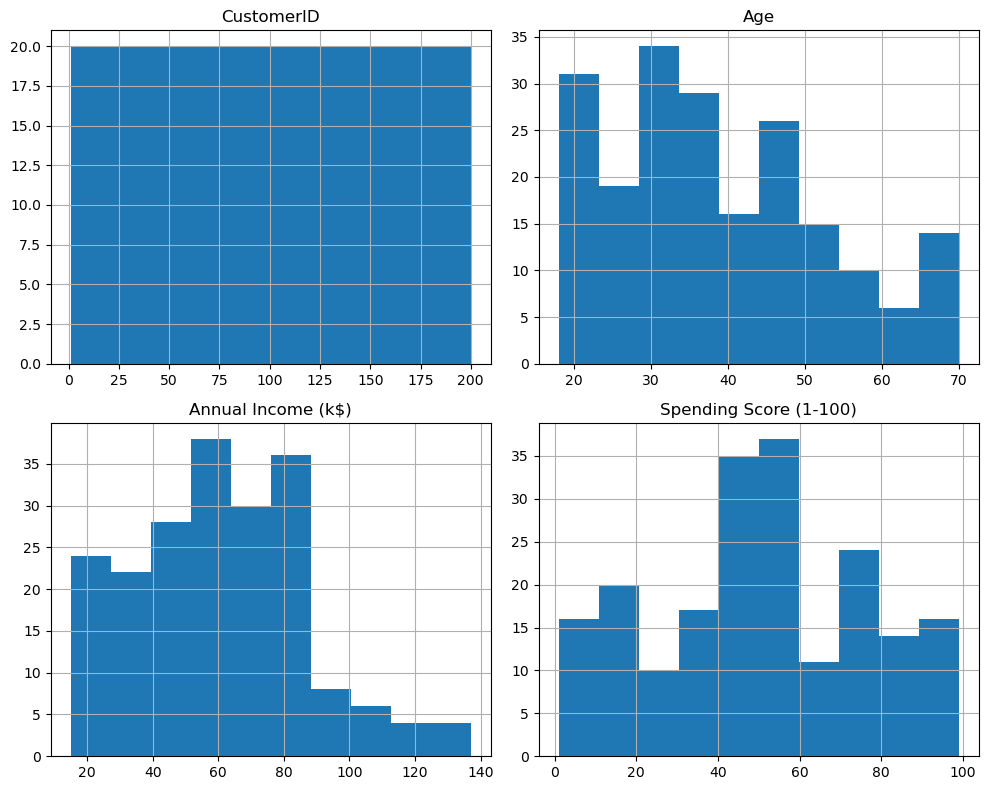

In [6]:
# Importar la librería para gráficos
import matplotlib.pyplot as plt

# Visualizar la distribución de las variables numéricas
df.hist(figsize=(10, 8))  # Ajusta el tamaño del gráfico si es necesario
plt.tight_layout()  # Asegura que el gráfico se vea bien
plt.show()


In [7]:
# Eliminar la columna CustomerID (no la necesitamos para el clustering)
df = df.drop(columns=['CustomerID'])

# Convertir la columna 'Gender' en variables numéricas (0 para Male, 1 para Female)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Verificar los cambios
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [9]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

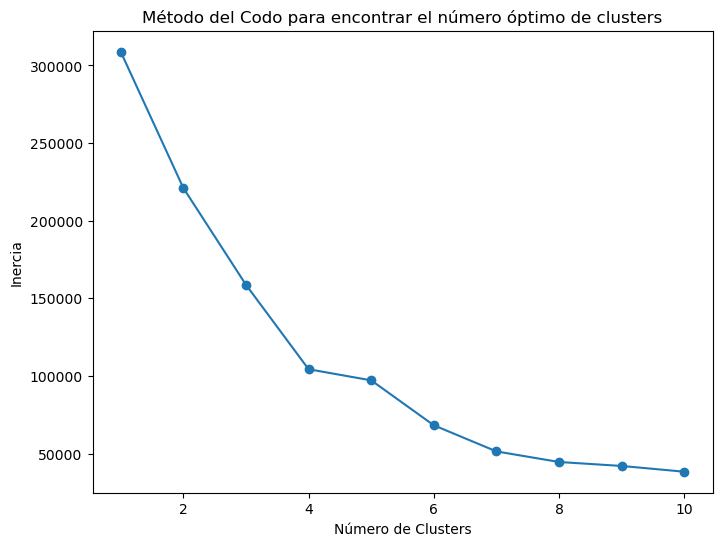

In [10]:
# Importar librerías
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Evitar las advertencias

# Importar la librería para K-means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes para el clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Calcular la inercia (suma de las distancias cuadradas dentro de cada cluster) para diferentes valores de K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()


In [11]:
# Aplicar K-means con K=4
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Ver los primeros registros con las etiquetas de los clusters
df.head()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,0
3,1,23,16,77,2
4,1,31,17,40,0


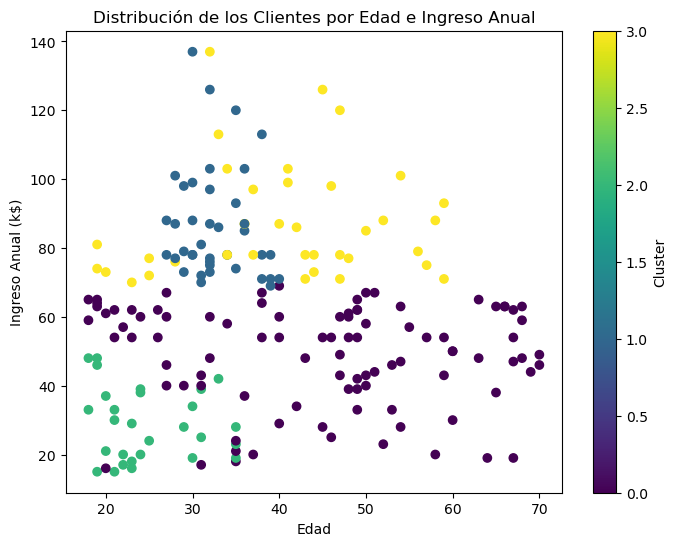

In [12]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión con los clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='viridis')
plt.title('Distribución de los Clientes por Edad e Ingreso Anual')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.colorbar(label='Cluster')
plt.show()


In [13]:
# Calcular estadísticas descriptivas por cluster
df.groupby('Cluster').mean()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.621053,44.894737,48.705263,42.631579
1,0.538462,32.692308,86.538462,82.128205
2,0.500000,24.821429,28.714286,74.250000
3,0.473684,40.394737,87.000000,18.631579


In [14]:
df.isnull().sum()


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64

In [15]:
df.duplicated().sum()


0

In [16]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas numéricas para estandarizar
columns_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Aplicamos la estandarización
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Mostramos las primeras filas para verificar el cambio
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,-1.424569,-1.738999,-0.434801,2
1,0,-1.281035,-1.738999,1.195704,2
2,1,-1.352802,-1.700830,-1.715913,0
3,1,-1.137502,-1.700830,1.040418,2
4,1,-0.563369,-1.662660,-0.395980,0


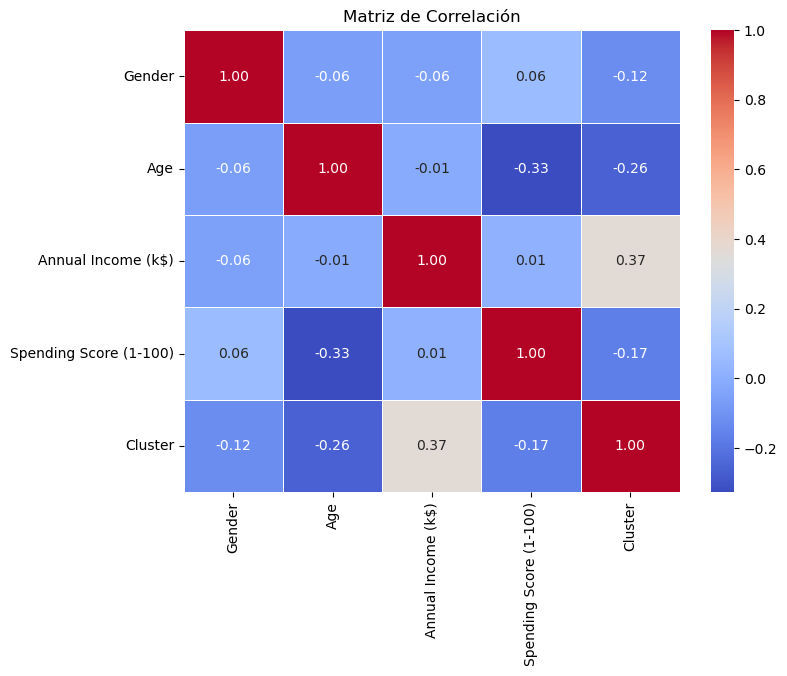

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Definir las características y la variable objetivo (en este caso, el cluster)
X = df.drop(columns=["Cluster", "Gender"])  # Eliminamos la columna 'Cluster' y 'Gender' porque son variables no numéricas o de salida
y = df["Cluster"]

# Crear un modelo RandomForestClassifier para calcular la importancia de las características
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Obtener la importancia de las características
importances = rf.feature_importances_

# Crear un dataframe para mostrar las importancias de las características
importances_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Mostrar las características más importantes
print(importances_df)


                  Feature  Importance
1      Annual Income (k$)    0.437226
2  Spending Score (1-100)    0.381117
0                     Age    0.181657


In [19]:
from sklearn.cluster import KMeans

# Selección de características relevantes (como decidimos antes)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Entrenamiento del modelo K-Means
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)

# Resultados del clustering
df['KMeans_Cluster'] = kmeans.labels_

# Ver los centros de los clusters
centroids = kmeans.cluster_centers_

# Mostrar los resultados
print("Centroides de los clusters: ")
print(centroids)
print("\nCluster asignados a cada cliente:")
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'KMeans_Cluster']].head())


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Centroides de los clusters: 
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]

Cluster asignados a cada cliente:
        Age  Annual Income (k$)  Spending Score (1-100)  KMeans_Cluster
0 -1.424569           -1.738999               -0.434801               4
1 -1.281035           -1.738999                1.195704               2
2 -1.352802           -1.700830               -1.715913               4
3 -1.137502           -1.700830                1.040418               2
4 -0.563369           -1.662660               -0.395980               4


In [21]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Evaluar el desempeño del modelo
silhouette = silhouette_score(X, kmeans.labels_)  # X es el DataFrame con las características seleccionadas
calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)

print(f"Coeficiente de Silhouette: {silhouette}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")


Coeficiente de Silhouette: 0.5546571631111091
Índice de Calinski-Harabasz: 248.64932001536357
